# Fundamental Analysis

In [1]:
import pandas as pd
from vnstock import Vnstock
# Set date range
start_date = '2024-01-01'
end_date = '2025-03-19'
interval = '1D'
symbol='REE'
stock = Vnstock().stock(symbol=symbol, source='VCI')
candle_df = stock.quote.history(start= start_date, end= end_date)

Phiên bản Vnstock 3.2.5 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.2

In [2]:
CashFlow = stock.finance.cash_flow(period='year')
#CashFlow.to_csv('./outputs/CashFlow.csv')

## Transpose the CF dataframe 

In [3]:
#CashFlow
CashFlow_transposed = CashFlow.T
CashFlow_transposed.columns = CashFlow['yearReport']
# Drop the duplicate 'yearReport' row
CashFlow_transposed = CashFlow_transposed.drop('yearReport')


# Convert the built-in visulization method to seaborn for a more polished look

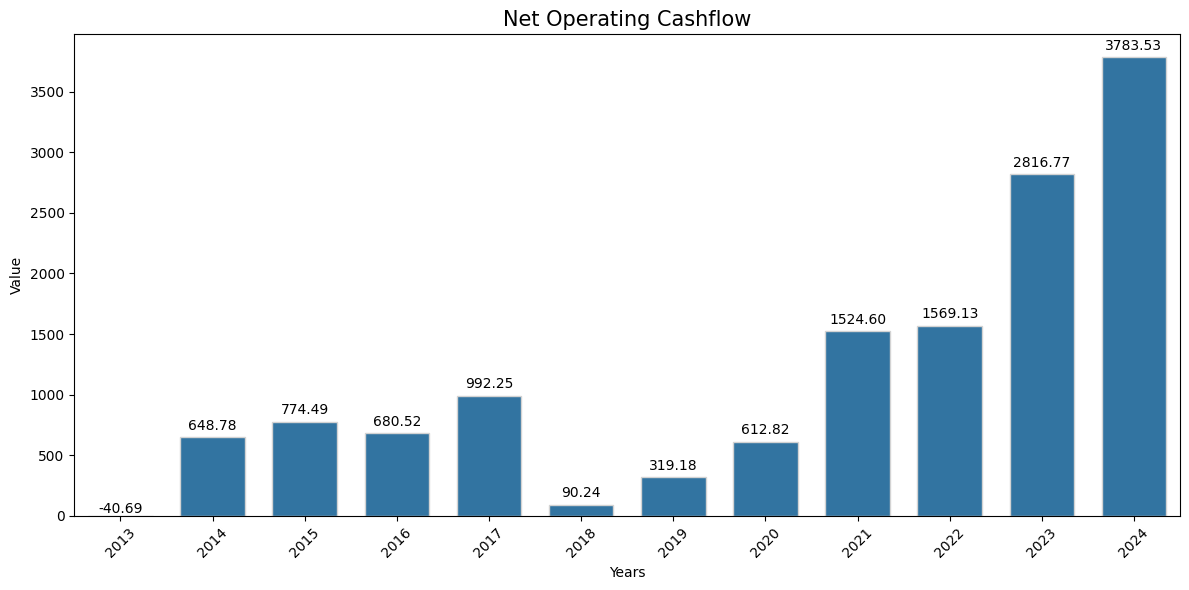

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming CashFlow is a DataFrame you already have
# Normalize values to billions
data = CashFlow['Net cash inflows/outflows from operating activities'] / 1000_000_000

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Sort data by year to ensure proper ordering
sorted_indices = CashFlow['yearReport'].argsort()
years = CashFlow['yearReport'].iloc[sorted_indices]
sorted_data = data.iloc[sorted_indices]

# Create the vertical bar plot with sorted data
ax = sns.barplot(
    x=years,                # Sorted years on x-axis
    y=sorted_data,          # Sorted data values on y-axis
    edgecolor='lightgrey',
    width=0.7
)

# Set title and labels with specified font sizes
plt.title('Net Operating Cashflow', fontsize=15)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Value', fontsize=10)

# Turn off grid
plt.grid(False)

# Add data labels with minimal gap above bars
for i, v in enumerate(sorted_data):
    # Much smaller offset - adjust the multiplier as needed
    offset = 0.01 * max(sorted_data)
    
    ax.text(
        i,                       # x position (bar index)
        v + offset,              # Position with minimal gap
        f'{v:.2f}',              # formatted value 
        ha='center',             # horizontal alignment
        va='bottom',             # vertical alignment
        fontsize=10
    )

# Adjust y-axis limit to make room for labels
ymax = max(sorted_data) * 1.05  # Add just 5% padding to y-axis
plt.ylim(0, ymax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Save the seaborn figure
#plt.savefig('./outputs/Net OCF.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [5]:
Ratio = stock.finance.ratio(period='year', lang='vi', dropna=True)

### Transpose the data frame to display on the web.

In [6]:
Ratio_transposed = Ratio.T
Ratio_transposed.columns=Ratio_transposed.iloc[1]
Ratio_transposed = Ratio_transposed.iloc[3:]

In [7]:
# Example: Select the 'ROE (%)' column under 'Chỉ tiêu khả năng sinh lợi'
dividend_yield = Ratio[('Chỉ tiêu khả năng sinh lợi', 'Tỷ suất cổ tức (%)')]
Outstanding_Shares = Ratio[('Chỉ tiêu định giá', 'Số CP lưu hành (Triệu CP)')]


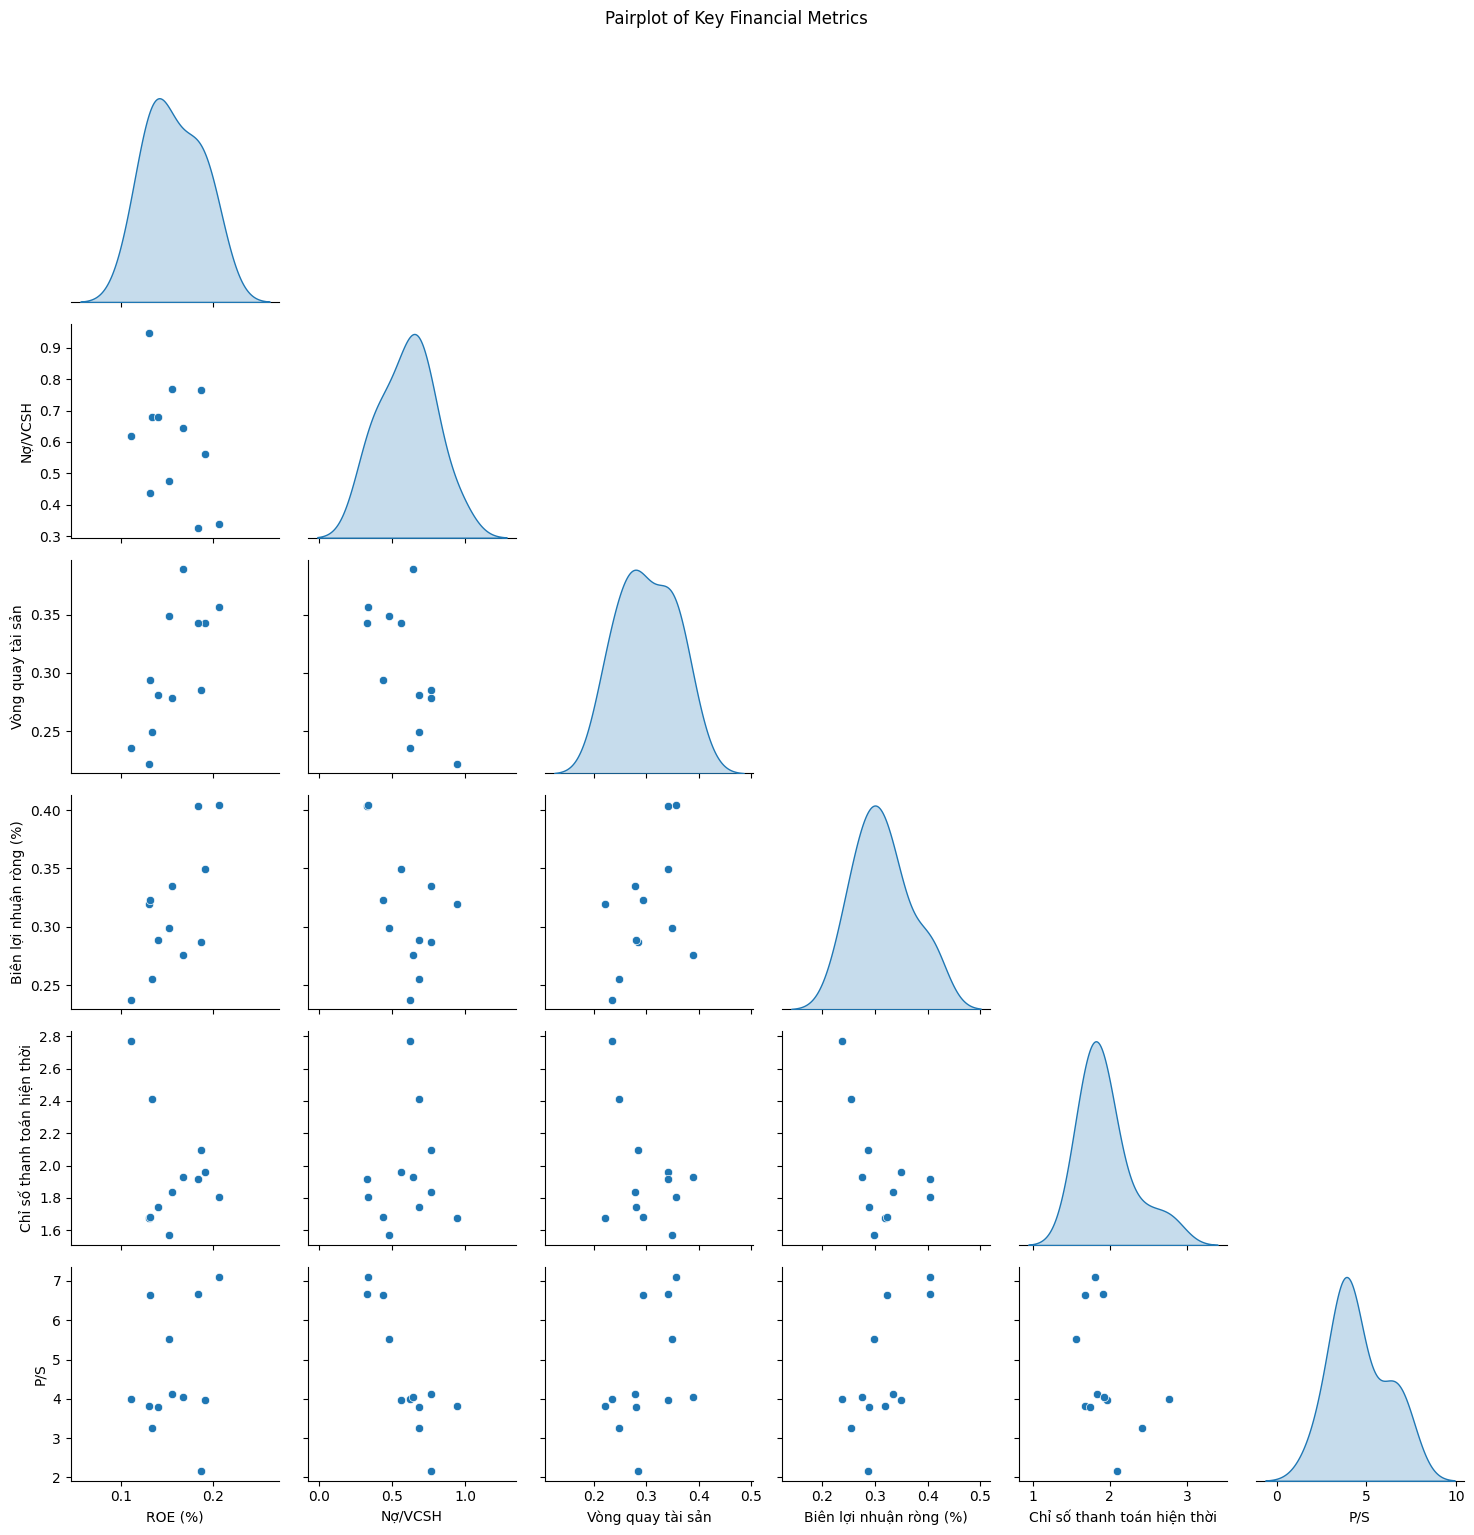

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the five most meaningful metrics (six columns for all pairwise relationships)
selected_cols = [
    ('Chỉ tiêu khả năng sinh lợi', 'ROE (%)'),
    ('Chỉ tiêu cơ cấu nguồn vốn', 'Nợ/VCSH'),
    ('Chỉ tiêu hiệu quả hoạt động', 'Vòng quay tài sản'),
    ('Chỉ tiêu khả năng sinh lợi', 'Biên lợi nhuận ròng (%)'),
    ('Chỉ tiêu thanh khoản', 'Chỉ số thanh toán hiện thời'),
    ('Chỉ tiêu định giá', 'P/S'),
]

# Subset the DataFrame
df_pair = Ratio[selected_cols].copy()

# Use only the second part of each column tuple (the metric name)
df_pair.columns = [col[1] for col in df_pair.columns]

# Optional: Remove rows with missing values for these columns
#df_pair = df_pair.dropna()

# Create the pairplot
sns.pairplot(df_pair, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Financial Metrics', y=1.02)
plt.tight_layout()
plt.show()

### Transform the balance sheet from long format to wide format. 

In [9]:
def BS_wide(stock=None):
    """
    Transform balance sheet data into a wide format with years as columns and metrics as rows.
    
    Parameters:
    -----------
    stock : object, default=None
        The stock ticker object containing financial data.
        If None, will create a default stock object for REE from VCI source.
    
    Returns:
    --------
    pandas.DataFrame
        Transformed balance sheet with years as columns and financial metrics as rows
    """
    
    # Create default stock object if not provided
    if stock is None:
        stock = Vnstock().stock(symbol= symbol, source='VCI')
    
    # Get the balance sheet data
    BS = stock.finance.balance_sheet(period='year', lang='en', dropna=True)
    
    # Transpose the DataFrame
    BS_wide = BS.T
    
    # Promote header by setting column names using the second row (index 1)
    BS_wide.columns = BS_wide.iloc[1]
    
    # Keep only the data rows (skip the first 3 rows)
    BS_wide = BS_wide.iloc[3:]
    
    return BS_wide

In [10]:
# BS_wide(stock)

In [11]:
BalanceSheet = stock.finance.balance_sheet(period='year', lang='en', dropna=True)
BalanceSheet_Transposed = BalanceSheet.T
BalanceSheet_Transposed.columns = BalanceSheet_Transposed.iloc[1]
BalanceSheet_Transposed = BalanceSheet_Transposed.iloc[3:]


### Transform Income statement from long format to wide format. 

In [12]:
IncomeStatement = stock.finance.income_statement(period='year', lang='en', dropna=True)
IncomeStatement_Transpose= IncomeStatement.T
IncomeStatement_Transpose.columns = IncomeStatement_Transpose.iloc[1]
IncomeStatement_Transpose = IncomeStatement_Transpose.iloc[3:]


In [13]:
# import os
# import pandas as pd

# def save_financial_statements_to_csv(balance_sheet_df, income_statement_df, cashflow_df, output_dir='./outputs'):
#     """
#     Save financial statements DataFrames to CSV files in the specified output directory.
    
#     Parameters:
#     -----------
#     balance_sheet_df : pandas.DataFrame
#         Balance Sheet DataFrame
#     income_statement_df : pandas.DataFrame
#         Income Statement DataFrame
#     cashflow_df : pandas.DataFrame
#         Cash Flow Statement DataFrame
#     output_dir : str
#         Directory path where CSV files will be saved (default: './outputs')
#     """
    
#     # Create output directory if it doesn't exist
#     try:
#         os.makedirs(output_dir, exist_ok=True)
#         print(f"Output directory '{output_dir}' is ready.")
#     except Exception as e:
#         print(f"Error creating directory: {e}")
#         return
    
#     # Dictionary of DataFrames and their corresponding filenames
#     statements = {
#         'REE_BalanceSheet_Transposed.csv': balance_sheet_df,
#         'REE_IncomeStatement_Transpose.csv': income_statement_df,
#         'REE_CashFlow_transposed.csv': cashflow_df
#     }
    
#     # Save each DataFrame to CSV
#     for filename, df in statements.items():
#         try:
#             file_path = os.path.join(output_dir, filename)
#             df.to_csv(file_path)
#             print(f"Successfully saved {filename}")
#         except Exception as e:
#             print(f"Error saving {filename}: {e}")

# # Example usage:
# # save_financial_statements_to_csv(
# #     BalanceSheet_Transposed,
# #     IncomeStatement_Transpose,
# #     CashFlow_transposed
# # )

In [14]:
from vnstock import Vnstock
import warnings
warnings.filterwarnings("ignore")
company = Vnstock().stock(symbol=symbol, source='TCBS').company


2025-05-17 15:56:09 - vnstock.common.data.data_explorer - INFO - TCBS không cung cấp thông tin danh sách. Dữ liệu tự động trả về từ VCI.


In [22]:
# Levered Free Cash Flow (accounts for debt repayments/receipts)
CashFlow['Levered Free Cash Flow'] = (
    CashFlow['Net cash inflows/outflows from operating activities'] 
    - CashFlow['Purchase of fixed assets']
    + CashFlow['Proceeds from disposal of fixed assets']
    - (CashFlow['Repayment of borrowings'] - CashFlow['Proceeds from borrowings'])
)

In [23]:
dividend_coverage_ratio = CashFlow['Levered Free Cash Flow'] / CashFlow['Dividends paid'].abs()

# Using Market value cost of debt

Market-Based WACC Calculation Results:
  ticker  yearReport  wacc_market_based
0    REE        2024           0.076009
1    REE        2023           0.076611
2    REE        2022           0.076610
3    REE        2021           0.080471
4    REE        2020           0.078101

Average Market-Based WACC by Year:
0.07620044174041848


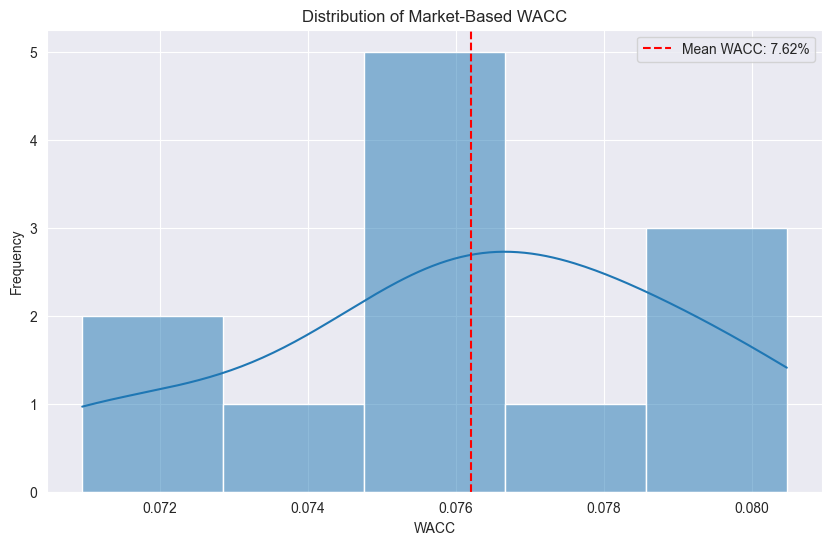

In [26]:
# Step 1: Get book values from Balance Sheet
short_term_debt = BalanceSheet['Short-term borrowings (Bn. VND)']
long_term_debt = BalanceSheet['Long-term borrowings (Bn. VND)']
total_debt = short_term_debt + long_term_debt
book_equity = BalanceSheet["OWNER'S EQUITY(Bn.VND)"]

# Step 2: Get market values
# Market capitalization for equity
market_value_of_equity = Ratio[('Chỉ tiêu định giá', 'Vốn hóa (Tỷ đồng)')]  # Market capitalization

# Use book value of debt as a proxy for market value of debt
# (In practice, we'd prefer bond prices or yield-based valuation if available)
market_value_of_debt = total_debt

# Calculate total market capital and weights
total_market_capital = market_value_of_equity + market_value_of_debt
market_weight_of_debt = market_value_of_debt.div(total_market_capital).fillna(0)
market_weight_of_equity = market_value_of_equity.div(total_market_capital).fillna(0)

# Step 3: Market-based cost of debt
# Option 1: If you have specific bond yield data (example values)
# In reality, this would vary by company or be derived from external data sources
base_interest_rate = 0.04  # e.g., Vietnamese government bond rate
credit_spread = 0.03       # Credit spread based on company rating
company_bond_yield = base_interest_rate + credit_spread  # = 0.05 (5%)

# Option 2: Use credit rating to determine yield (if available)
# This would be a mapping from credit ratings to yields
# rating_to_yield = {'AAA': 0.035, 'AA': 0.04, 'A': 0.045, 'BBB': 0.05, 'BB': 0.06, 'B': 0.07}
# company_bond_yield = rating_to_yield.get(company_rating, 0.05)  # Default to 5% if rating unknown

# Use fixed rate for simplicity (you would replace this with company-specific data)
market_cost_of_debt = 0.07  # 7% bond yield

# Apply tax shield
statutory_tax_rate = 0.12  # Vietnamese corporate tax rate
after_tax_market_cost_of_debt = market_cost_of_debt * (1 - statutory_tax_rate)

# Step 4: Cost of Equity using CAPM
risk_free_rate = 0.03  # Vietnamese government bond yield

# Option 1: If you have beta data from external sources
# estimated_beta = external_beta_data  # This would be company-specific

# Option 2: Estimate beta using financial leverage
financial_leverage = Ratio[('Chỉ tiêu thanh khoản', 'Đòn bẩy tài chính')]
leverage_mean = financial_leverage.mean()
estimated_beta = 1.0 * financial_leverage.div(leverage_mean).fillna(1.0)  # Default to 1.0 if issues

# Market risk premium
market_risk_premium = 0.05  # Estimated risk premium for Vietnamese market

# Calculate cost of equity using CAPM
cost_of_equity = risk_free_rate + (estimated_beta * market_risk_premium)

# Step 5: Calculate market-based WACC
wacc_market_based = (market_weight_of_debt * after_tax_market_cost_of_debt) + (market_weight_of_equity * cost_of_equity)

# Create a DataFrame with the results
result_df = pd.DataFrame({
    'ticker': BalanceSheet['ticker'],
    'yearReport': BalanceSheet['yearReport'],
    'market_cap': market_value_of_equity,
    'market_debt': market_value_of_debt,
    'market_weight_of_debt': market_weight_of_debt,
    'market_weight_of_equity': market_weight_of_equity,
    'market_cost_of_debt': after_tax_market_cost_of_debt,
    'beta': estimated_beta,
    'cost_of_equity': cost_of_equity,
    'wacc_market_based': wacc_market_based
})

# Display first few rows to check the results
print("Market-Based WACC Calculation Results:")
print(result_df[['ticker', 'yearReport', 'wacc_market_based']].head())


# Calculate average
avg_wacc_by_year = result_df['wacc_market_based'].mean()
print("\nAverage Market-Based WACC by Year:")
print(avg_wacc_by_year)

# Optional: Visualize the distribution of market-based WACC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(result_df['wacc_market_based'].dropna(), kde=True)
plt.title('Distribution of Market-Based WACC')
plt.xlabel('WACC')
plt.ylabel('Frequency')
plt.axvline(result_df['wacc_market_based'].mean(), color='red', linestyle='--', 
            label=f'Mean WACC: {result_df["wacc_market_based"].mean():.2%}')
plt.legend()
plt.show()



In [27]:
import pandas as pd
import numpy as np

def dcf_time_series(df, cash_flow_col, date_col, discount_rate, base_date=None):
    """
    Calculate DCF using a pandas DataFrame with dates.
    
    Parameters:
    df (DataFrame): DataFrame containing cash flows and dates
    cash_flow_col (str): Column name for cash flows
    date_col (str): Column name for dates
    discount_rate (float): Annual discount rate
    base_date (datetime, optional): Base date for discounting, defaults to min date
    
    Returns:
    float: Present value of cash flows
    """
    # Ensure dates are datetime objects
    df[date_col] = pd.to_datetime(df[date_col])
    
    if base_date is None:
        base_date = df[date_col].min()
    
    # Calculate years from base date
    df['years'] = (df[date_col] - base_date).dt.days / 365.25
    
    # Calculate discount factors
    df['discount_factor'] = 1 / (1 + discount_rate) ** df['years']
    
    # Calculate present values
    df['present_value'] = df[cash_flow_col] * df['discount_factor']
    
    return df['present_value'].sum()

In [28]:
import pandas as pd

def full_dcf_model(projected_fcf, terminal_growth_rate, wacc, terminal_year):
    """
    Simple DCF model to calculate enterprise value.

    :param projected_fcf: List of projected free cash flows for each forecast year.
    :param terminal_growth_rate: Growth rate applied after the forecast period.
    :param wacc: Weighted Average Cost of Capital used as the discount rate.
    :param terminal_year: Number of years in the forecast period.
    :return: Calculated enterprise value.
    """
    # Calculate the PV of projected cash flows
    present_value_fcf = sum(fcf / ((1 + wacc) ** (i + 1)) for i, fcf in enumerate(projected_fcf))
    
    # Calculate the terminal value
    last_year_fcf = projected_fcf[-1]
    terminal_value = last_year_fcf * (1 + terminal_growth_rate) / (wacc - terminal_growth_rate)
    
    # Present value of the terminal value
    present_value_terminal = terminal_value / ((1 + wacc) ** terminal_year)
    
    # Total enterprise value is the sum of the PV of FCF and PV of terminal value
    enterprise_value = present_value_fcf + present_value_terminal
    
    return enterprise_value

# Ensure CashFlow is a properly defined DataFrame with 'Levered Free Cash Flow'
# Example setup, ensure that 'CashFlow' exists with your data
# CashFlow = pd.DataFrame({'Levered Free Cash Flow': [...]})

# Extract the free cash flow for the stock
free_cash_flow = CashFlow['Levered Free Cash Flow']

# Determine whether to use the mean or a specific value of FCF
# Calculate the mean directly if there are multiple entries for the stock
ticker_fcf = free_cash_flow.mean() if len(free_cash_flow) > 1 else free_cash_flow.iloc[0]

# Define your parameters
forecast_years = 5
terminal_growth_rate = 0.03  # Long-term growth rate
growth_rates = [0.05, 0.06, 0.07, 0.05, 0.04]  # Growth rates for next 5 years

# Retrieve WACC for this single stock from a relevant DataFrame
# Ensure result_df is properly defined
# result_df = pd.DataFrame({'wacc_market_based': [...]})
ticker_wacc = result_df['wacc_market_based'].mean()  # Ensure result_df is defined and contains 'wacc_market_based'

# Project future cash flows
projected_fcf = []
for i, growth in enumerate(growth_rates):
    if i == 0:
        projected_fcf.append(ticker_fcf * (1 + growth))
    else:
        projected_fcf.append(projected_fcf[i-1] * (1 + growth))

# Calculate enterprise value for the single stock
ev = full_dcf_model(projected_fcf, terminal_growth_rate, ticker_wacc, terminal_year=forecast_years)

# Store the results
enterprise_values = {
    'ticker': symbol,  # Replace 'YOUR_TICKER' with the actual stock ticker
    'wacc': ticker_wacc,
    'last_fcf': ticker_fcf,
    'enterprise_value': ev
}

# Convert to DataFrame if desired for structured display
enterprise_values_df = pd.DataFrame([enterprise_values])

# Display the result
print(enterprise_values_df)

  ticker    wacc      last_fcf  enterprise_value
0    REE  0.0762  6.620514e+12      1.642414e+14


In [29]:
#intrinsic_value = ev - net_debt / Outstanding_Shares
intrinsic_value = ev / Outstanding_Shares
print(intrinsic_value)

0     348698.010348
1     400868.242729
2     460820.999382
3     529710.537836
4     529710.537836
5     529710.537836
6     529710.537836
7     529710.537836
8     529710.537836
9     609166.154837
10    610402.893001
11    622866.574727
Name: (Chỉ tiêu định giá, Số CP lưu hành (Triệu CP)), dtype: float64


In [30]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

def create_cashflow_waterfall(df, ticker, year):
    # Filter dataframe for specific ticker and year
    data = df[(df['ticker'] == ticker) & (df['yearReport'] == year)].iloc[0]
    
    # Select components for the waterfall chart
    measures = [
        'Operating profit before changes in working capital',
        'Increase/Decrease in receivables',
        'Increase/Decrease in inventories',
        'Increase/Decrease in payables',
        'Increase/Decrease in prepaid expenses',
        'Interest paid',
        'Business Income Tax paid',
        'Other receipts from operating activities',
        'Other payments on operating activities',
        'Purchase of fixed assets',
        'Proceeds from disposal of fixed assets',
        'Investment in other entities',
        'Proceeds from divestment in other entities',
        'Gain on Dividend',
        'Increase in charter captial',
        'Payments for share repurchases',
        'Proceeds from borrowings',
        'Repayment of borrowings',
        'Dividends paid'
    ]
    
    # Extract values for these measures
    values = [data[measure] for measure in measures]
    
    # Create labels for the chart (shortened for better display)
    labels = [m.split('/')[-1].replace(' activities', '') if '/' in m else m for m in measures]
    labels = [label[:20] + '...' if len(label) > 20 else label for label in labels]
    
    # Set up measure types (relative vs total)
    measure_types = ['relative'] * len(measures)
    
    # Add initial and final cash positions
    labels = ['Initial Balance'] + labels + ['Ending Balance']
    values = [data['Cash and cash equivalents']] + values + [data['Cash and Cash Equivalents at the end of period']]
    measure_types = ['absolute'] + measure_types + ['total']
    
    # Create the waterfall chart with comma-separated numbers
    fig = go.Figure(go.Waterfall(
        name = f"Cashflow Waterfall for {ticker} ({year})",
        orientation = "v",
        measure = measure_types,
        x = labels,
        textposition = "outside",
        # Format numbers with commas as thousands separators
        text = [f"{x:,.1f}" for x in values],
        y = values,
        connector = {"line":{"color":"rgb(63, 63, 63)"}},
    ))
    
    # Update layout
    fig.update_layout(
        title = f"Cashflow Waterfall Chart for {ticker} ({year})",
        showlegend = False,
        height = 600,
        width = 1000,
        xaxis = dict(
            title = "Cash inflows/outflows",
            tickangle = 45
        ),
        yaxis = dict(
            title = "Amount",
            # Add comma separator to y-axis labels as well
            tickformat = ",.0f"
        )
    )
    
    return fig

# Example usage
# Replace 'REE' and 2024 with your desired ticker and year
cf_year = 2024

fig = create_cashflow_waterfall(CashFlow, 'REE', cf_year)
fig.show()

# If you prefer to save the figure
# fig.write_html("cashflow_waterfall.html")

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio):
    """
    Calculate ROCE and include ROE from Ratio dataframe with MultiIndex columns.
    
    Parameters:
    -----------
    BalanceSheet : pandas DataFrame
        Balance Sheet data with columns: ticker, yearReport, 'TOTAL ASSETS (Bn. VND)', 'Current liabilities (Bn. VND)'
    IncomeStatement : pandas DataFrame
        Income Statement data with columns: ticker, yearReport, 'Operating Profit/Loss'
    Ratio : pandas DataFrame
        Ratio data with MultiIndex columns including ('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with ROCE and ROE calculations
    """
    # Create a copy to avoid modifying the original dataframe
    BalanceSheet_copy = BalanceSheet.copy()
    
    # Step 1: Calculate Capital Employed
    BalanceSheet_copy['Capital Employed (Bn. VND)'] = (
        BalanceSheet_copy['Long-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy['Short-term borrowings (Bn. VND)'] + 
        BalanceSheet_copy["OWNER'S EQUITY(Bn.VND)"]
    )
    
    # Step 2: Merge Balance Sheet and Income Statement
    merged_df = pd.merge(
        BalanceSheet_copy[['ticker', 'yearReport', 'Capital Employed (Bn. VND)']],
        IncomeStatement[['ticker', 'yearReport', 'Operating Profit/Loss']],
        on=['ticker', 'yearReport'],
        how='inner'
    )
    
    # Step 3: Calculate ROCE
    merged_df['ROCE'] = merged_df['Operating Profit/Loss'] / merged_df['Capital Employed (Bn. VND)']
    
    # Select columns for ROCE calculation
    ROCE_df = merged_df[['ticker', 'yearReport', 'Operating Profit/Loss', 
                         'Capital Employed (Bn. VND)', 'ROCE']]
    ROCE_df = ROCE_df.rename(columns={'Operating Profit/Loss': 'EBIT (Bn. VND)'})
    
    # Step 4: Create a simplified version of Ratio DataFrame for merging
    # Extract the ticker, year, and ROE columns
    ratio_simple = pd.DataFrame({
        'ticker': Ratio[('Meta', 'CP')],
        'yearReport': Ratio[('Meta', 'Năm')],
        'ROE': Ratio[('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')]
    })
    
    # Step 5: Merge with simplified Ratio dataframe to include ROE
    ROCE_df = pd.merge(
        ROCE_df,
        ratio_simple[['ticker', 'yearReport', 'ROE']],
        on=['ticker', 'yearReport'],
        how='left'
    )
    
    return ROCE_df

def visualize_roce_vs_roe(BalanceSheet, IncomeStatement, Ratio):
    """
    Calculate and visualize only the ROCE vs ROE comparison.
    
    Parameters:
    -----------
    BalanceSheet : pandas DataFrame
        Balance Sheet data
    IncomeStatement : pandas DataFrame
        Income Statement data
    Ratio : pandas DataFrame
        Ratio data containing ROE with MultiIndex columns
    """
    # Calculate ROCE and include ROE
    ROCE_df = calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio)
    
    # Sort by ticker and year
    ROCE_df = ROCE_df.sort_values(['ticker', 'yearReport'])
    
    # Create a comparison chart for each ticker
    for ticker in ROCE_df['ticker'].unique():
        ticker_data = ROCE_df[ROCE_df['ticker'] == ticker]
        
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        # Create plot for ROCE
        color = 'tab:blue'
        ax1.set_xlabel('Year', fontsize=12)
        ax1.set_ylabel('ROCE', color=color, fontsize=12)
        ax1.plot(ticker_data['yearReport'], ticker_data['ROCE'], 'o-', color=color, linewidth=2, label='ROCE')
        ax1.tick_params(axis='y', labelcolor=color)
        
        # Add data labels for ROCE
        for i, row in ticker_data.iterrows():
            ax1.annotate(f"{row['ROCE']:.3f}", 
                        (row['yearReport'], row['ROCE']),
                        textcoords="offset points", 
                        xytext=(0,10), 
                        ha='center', 
                        color=color,
                        fontsize=9)
        
        # Create second y-axis for ROE (%)
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('ROE (%)', color=color, fontsize=12)
        ax2.plot(ticker_data['yearReport'], ticker_data['ROE'], 's-', color=color, linewidth=2, label='ROE')
        ax2.tick_params(axis='y', labelcolor=color)
        
        # Add data labels for ROE
        for i, row in ticker_data.iterrows():
            ax2.annotate(f"{row['ROE']:.1f}%", 
                        (row['yearReport'], row['ROE']),
                        textcoords="offset points", 
                        xytext=(0,-15), 
                        ha='center', 
                        color=color,
                        fontsize=9)
        
        # Add legends for both lines
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
        
        plt.title(f'ROCE vs ROE (%) Comparison for {ticker}', fontsize=14)
        plt.grid(True)
        plt.xticks(rotation=45)
        
        # Add annotation explaining the relationship
        plt.figtext(0.5, 0.01, 
                   "ROE > ROCE: Effective use of financial leverage | ROCE > ROE: Potential underutilization of debt", 
                   ha="center", fontsize=10, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})
        
        plt.tight_layout(rect=[0, 0.05, 1, 0.95])
        plt.show()
    
    return ROCE_df



  ticker  yearReport  EBIT (Bn. VND)  Capital Employed (Bn. VND)      ROCE  \
0    REE        2024   2672346972019              32851827291499  0.081345   
1    REE        2023   3042127311430              31512920183225  0.096536   
2    REE        2022   3985852232731              30604777639150  0.130236   
3    REE        2021   2387222069978              28331835703693  0.084259   
4    REE        2020   1901472471574              17811997377269  0.106752   

        ROE  
0  0.110077  
1  0.133335  
2  0.186927  
3  0.129860  
4  0.139663  


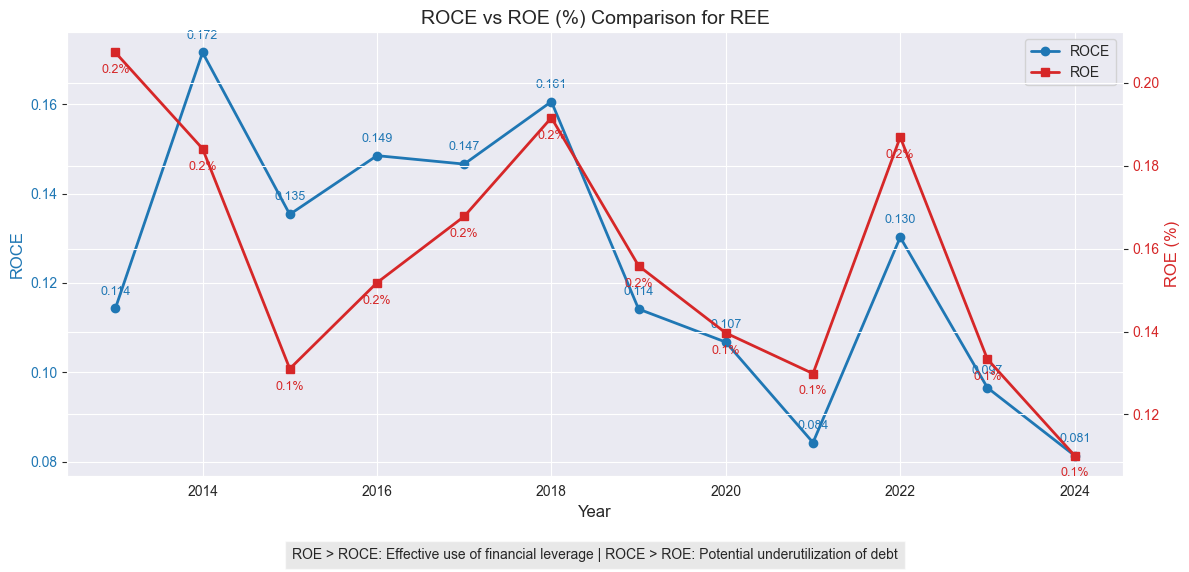

,ticker,yearReport,EBIT (Bn. VND),Capital Employed (Bn. VND),ROCE,ROE
11,REE,2013,653760115839,5719506891415,0.114304,0.207349
10,REE,2014,1209735776640,7049054886482,0.171617,0.184132
9,REE,2015,1038784287138,7674056085377,0.135363,0.131029
8,REE,2016,1368547876590,9214832267594,0.148516,0.151795
7,REE,2017,1711671841121,11674003426931,0.146623,0.167790
6,REE,2018,2105657869033,13109757690307,0.160618,0.191602
5,REE,2019,1909681072333,16728479197464,0.114157,0.155862
4,REE,2020,1901472471574,17811997377269,0.106752,0.139663
3,REE,2021,2387222069978,28331835703693,0.084259,0.129860
2,REE,2022,3985852232731,30604777639150,0.130236,0.186927


In [32]:
# Calculate ROCE and ROE
ROCE_df = calculate_roce_and_include_roe(BalanceSheet, IncomeStatement, Ratio)
print(ROCE_df.head())

# Visualize ROCE vs ROE comparison
visualize_roce_vs_roe(BalanceSheet, IncomeStatement, Ratio)

# Corporate Finance

In [33]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Get the years from both DataFrames
ratio_years = Ratio[('Meta', 'Năm')].astype(int).values
result_years = result_df['yearReport'].astype(int).values

# Find common years
common_years = sorted(list(set(ratio_years).intersection(set(result_years))))

# Filter and sort both DataFrames by common years
ratio_filtered = Ratio[Ratio[('Meta', 'Năm')].astype(int).isin(common_years)]
ratio_filtered = ratio_filtered.sort_values(('Meta', 'Năm'))

result_filtered = result_df[result_df['yearReport'].astype(int).isin(common_years)]
result_filtered = result_filtered.sort_values('yearReport')

# Calculate values using the filtered and aligned data
wacc_mean = result_filtered['wacc_market_based'].mean() * 100
roic_values = ratio_filtered[('Chỉ tiêu khả năng sinh lợi', 'ROIC (%)')] * 100
wacc_values = result_filtered['wacc_market_based'] * 100

# Create the figure
fig = go.Figure()

# Add ROIC line
fig.add_trace(go.Scatter(
    x=ratio_filtered[('Meta', 'Năm')],
    y=roic_values,
    name='ROIC (%)',
    line=dict(color='blue')
))

# Add WACC line
fig.add_trace(go.Scatter(
    x=result_filtered['yearReport'],
    y=wacc_values,
    name='WACC (%)',
    line=dict(color='green')
))

# Add horizontal line at WACC mean
fig.add_hline(
    y=wacc_mean,
    line_dash="dash",
    line_color="red",
    annotation_text=f"WACC Mean: {wacc_mean:.2f}%",
    annotation_position="bottom right"
)

# Only add shaded area if we have data points
if len(roic_values) > 0:
    # Create x values for the shaded area
    x_combined = np.concatenate([ratio_filtered[('Meta', 'Năm')], ratio_filtered[('Meta', 'Năm')][::-1]])
    y_upper = np.where(roic_values > wacc_mean, roic_values, wacc_mean)
    y_lower = np.full_like(roic_values, wacc_mean)
    y_combined = np.concatenate([y_upper, y_lower[::-1]])

    # Add the shaded area
    fig.add_trace(go.Scatter(
        x=x_combined,
        y=y_combined,
        fill='toself',
        fillcolor='rgba(0, 100, 255, 0.2)',
        line=dict(width=0),
        showlegend=True,
        name='Economic Value',
        legendgroup='economic_value',
        hoverinfo='skip'
    ))

# Add Economic Value annotation in upper left corner
fig.add_annotation(
    x=0.02,  # Left side
    y=0.95,  # Top side
    xref="paper",  # Use paper coordinates (0-1)
    yref="paper",  # Use paper coordinates (0-1)
    text="<b>Economic Value</b>",
    showarrow=False,
    font=dict(
        size=12,
        color="blue"
    ),
    bgcolor='rgba(0, 100, 255, 0.2)',  # Same as fill color
    bordercolor="blue",
    borderwidth=1,
    borderpad=4,
    opacity=0.8,
    xanchor="left",  # Left-align the text
    yanchor="top"    # Anchor at the top
)

# Update layout with legend at bottom
fig.update_layout(
    title='ROIC (%) vs WACC (%) with Economic Value Zone',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    showlegend=True,
    template='plotly_white',
    hovermode='x unified',
    margin=dict(t=50, l=50, r=50, b=80),  # Added more bottom margin for legend
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.3,  # Position below the x-axis
        xanchor="center",
        x=0.5,   # Center the legend
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.2)',
        borderwidth=1
    )
)

# Show the plot
fig.show()